DATA VISUALIZATION IN PANDAS


In [5]:
#Import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv(r"C:\Users\USER\Downloads\apple_sales_mock.csv")

In [9]:
df

,Order_ID,Customer_ID,Region,Product,Quantity,Unit_Price,Discount,Order_Date,Channel,Payment_Method,Total_Price
0,ORD1000,CUST24,East,iPhone,3,1299,0.05,2023-01-01,Reseller,Credit Card,3702.15
1,ORD1001,CUST77,West,iPhone,4,1299,0.00,2023-01-02,Online,Bank Transfer,5196.00
2,ORD1002,CUST41,North,MacBook,4,999,0.05,2023-01-03,Reseller,Bank Transfer,3796.20
3,ORD1003,CUST81,East,iPad,2,1999,0.15,2023-01-04,Retail Store,Bank Transfer,3398.30
4,ORD1004,CUST69,East,Apple Watch,1,399,0.15,2023-01-05,Reseller,Apple Pay,339.15
...,...,...,...,...,...,...,...,...,...,...,...
295,ORD1295,CUST54,West,iPad,2,499,0.05,2023-10-23,Retail Store,Bank Transfer,948.10
296,ORD1296,CUST19,South,Apple Watch,1,1999,0.00,2023-10-24,Reseller,Credit Card,1999.00
297,ORD1297,CUST90,East,iPhone,2,999,0.10,2023-10-25,Online,Apple Pay,1798.20
298,ORD1298,CUST56,North,MacBook,1,399,0.00,2023-10-26,Reseller,Bank Transfer,399.00


In [11]:
#Quick look at the data

print(df.head())
print(df.info())
print(df.describe())

  Order_ID Customer_ID Region      Product  Quantity  Unit_Price  Discount  \
0  ORD1000      CUST24   East       iPhone         3        1299      0.05   
1  ORD1001      CUST77   West       iPhone         4        1299      0.00   
2  ORD1002      CUST41  North      MacBook         4         999      0.05   
3  ORD1003      CUST81   East         iPad         2        1999      0.15   
4  ORD1004      CUST69   East  Apple Watch         1         399      0.15   

   Order_Date       Channel Payment_Method  Total_Price  
0  2023-01-01      Reseller    Credit Card      3702.15  
1  2023-01-02        Online  Bank Transfer      5196.00  
2  2023-01-03      Reseller  Bank Transfer      3796.20  
3  2023-01-04  Retail Store  Bank Transfer      3398.30  
4  2023-01-05      Reseller      Apple Pay       339.15  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          ------------

C:\Users\USER\AppData\Local\Temp\ipykernel_12348\1252697253.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(
C:\Users\USER\AppData\Local\Temp\ipykernel_12348\1252697253.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


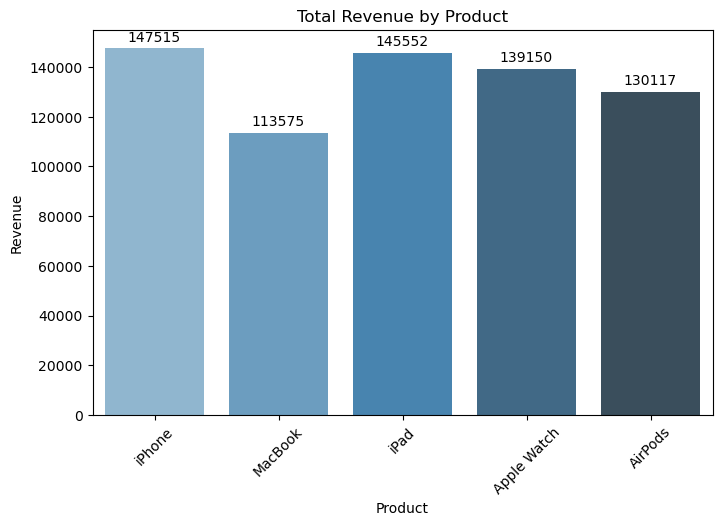

In [31]:
# ---------------- VISUAL 1: Total Revenue by Product (Bar Chart with Labels)

plt.figure(figsize=(8,5))
ax = sns.barplot(
    x="Product", 
    y="Total_Price", 
    data=df, 
    estimator=sum, 
    ci=None, 
    palette="Blues_d"
)

plt.title("Total Revenue by Product")
plt.ylabel("Revenue")
plt.xticks(rotation=45)

# Add data labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3)

plt.show()

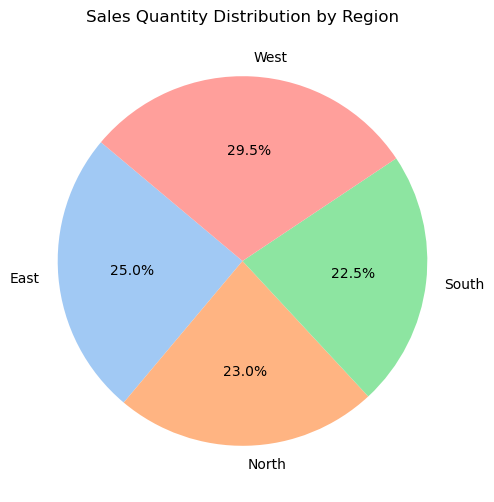

In [19]:
# ---------------- VISUAL 2: Sales Quantity by Region (Pie Chart)

region_sales = df.groupby("Region")["Quantity"].sum()
plt.figure(figsize=(6,6))
plt.pie(region_sales, labels=region_sales.index, autopct="%1.1f%%", startangle=140, colors=sns.color_palette("pastel"))
plt.title("Sales Quantity Distribution by Region")
plt.show()

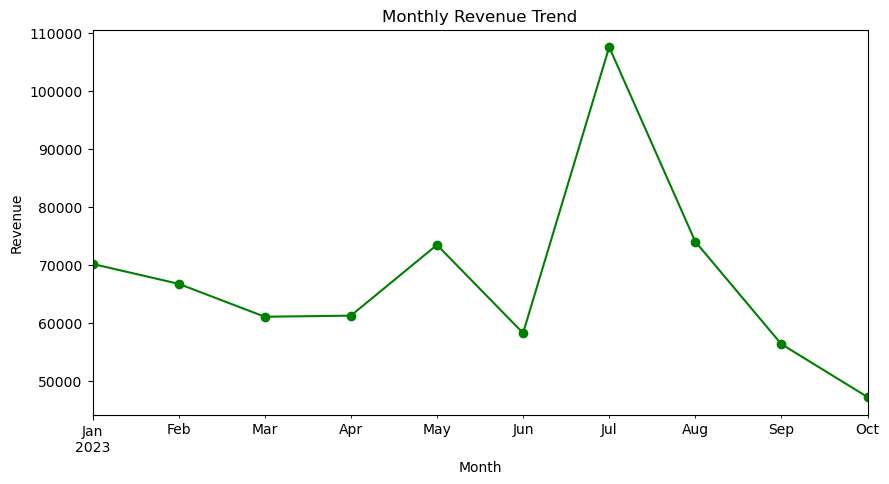

In [23]:
# ---------------- VISUAL 3: Monthly Revenue Trend (Line Chart)

# Ensure Order_Date is datetime
df["Order_Date"] = pd.to_datetime(df["Order_Date"], errors="coerce")

# Group by month
monthly_revenue = df.groupby(df["Order_Date"].dt.to_period("M"))["Total_Price"].sum()

# Plot
plt.figure(figsize=(10,5))
monthly_revenue.plot(kind="line", marker="o", color="green")
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()

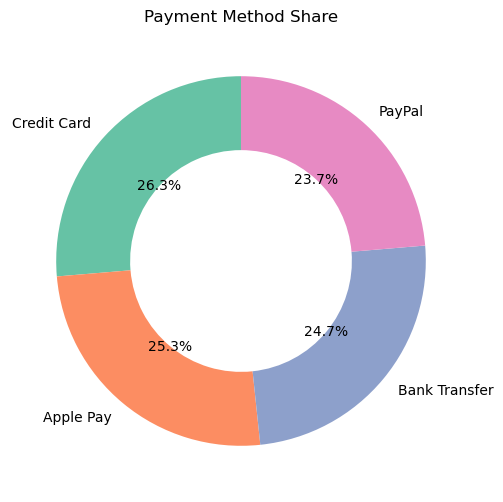

In [25]:
# ---------------- VISUAL 4: Payment Method Share (Donut Chart)

payment_share = df["Payment_Method"].value_counts()
plt.figure(figsize=(6,6))
plt.pie(payment_share, labels=payment_share.index, autopct="%1.1f%%", startangle=90, wedgeprops={"width":0.4}, colors=sns.color_palette("Set2"))
plt.title("Payment Method Share")
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_12348\2940152625.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(
C:\Users\USER\AppData\Local\Temp\ipykernel_12348\2940152625.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


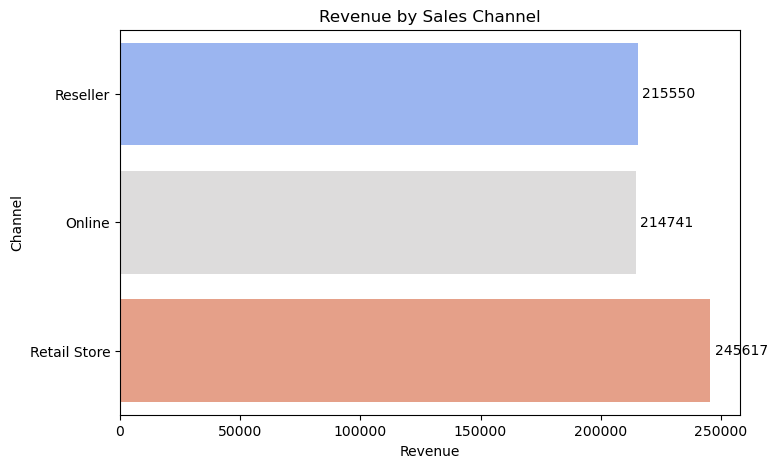

In [29]:
# ---------------- VISUAL 5: Revenue by Channel (Horizontal Bar Chart with Labels)
plt.figure(figsize=(8,5))
ax = sns.barplot(
    y="Channel", 
    x="Total_Price", 
    data=df, 
    estimator=sum, 
    ci=None, 
    palette="coolwarm"
)

plt.title("Revenue by Sales Channel")
plt.xlabel("Revenue")

# Add data labels
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3)

plt.show()